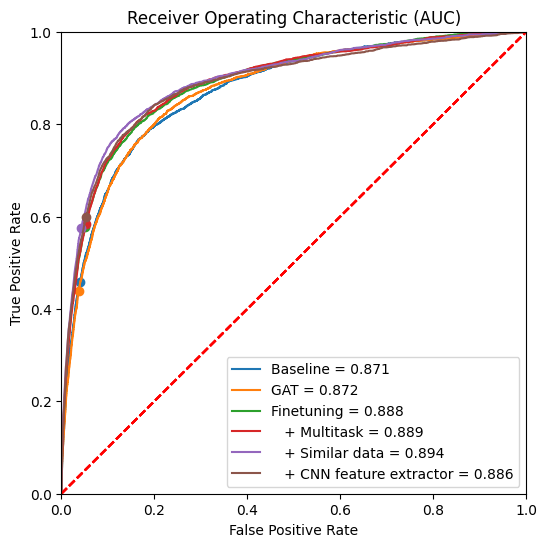

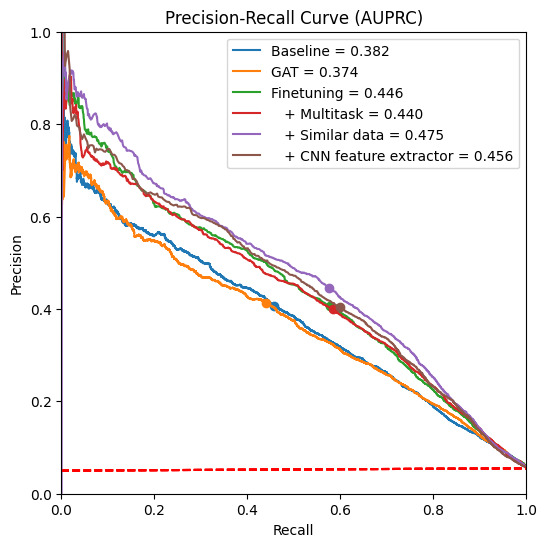

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

models = ['baseline-model','GAT', 'base-finetuned-model', 'multitask-finetuned-model', 'multitask-finetuned-model-with-ligysis', 'multitask-finetuned-model-with-CNN-with-ligysis']
rocauc_dict = {
    'baseline-model': 0.871,
    'GAT': 0.872,
    'base-finetuned-model': 0.888,
    'multitask-finetuned-model': 0.889,
    'multitask-finetuned-model-with-ligysis': 0.894,
    'multitask-finetuned-model-with-CNN-with-ligysis': 0.886
}
decision_threshold_dict = {
    'baseline-model': 0.95,
    'GAT': 0.75,
    'base-finetuned-model': 0.65,
    'multitask-finetuned-model': 0.65,
    'multitask-finetuned-model-with-ligysis': 0.70,
    'multitask-finetuned-model-with-CNN-with-ligysis': 0.85
}
auprc_dict = {
    'baseline-model': 0.382,
    'GAT': 0.374,
    'base-finetuned-model': 0.446,
    'multitask-finetuned-model': 0.440,
    'multitask-finetuned-model-with-ligysis': 0.475,
    'multitask-finetuned-model-with-CNN-with-ligysis': 0.456
}
names_dict = {
    'baseline-model': 'Baseline',
    'GAT': 'GAT',
    'base-finetuned-model': 'Finetuning',
    'multitask-finetuned-model': '   + Multitask',
    'multitask-finetuned-model-with-ligysis': "   + Similar data",
    'multitask-finetuned-model-with-CNN-with-ligysis': "   + CNN feature extractor"
}

for graph_type in ['rocauc', 'auprc']:
    plt.figure(figsize=(6,6))

    for i, model in enumerate(models):
        data = np.load(f"/home/skrhakv/cryptic-nn/src/auc-auprc/data/{model}-{graph_type}.npz")
        fpr = data['arr_0']
        tpr = data['arr_1']
        thresholds = data['arr_2']

        threshold = decision_threshold_dict[model]
        color = list(mcolors.TABLEAU_COLORS)[i]
        nearest_idx = np.where(abs(thresholds-threshold) == abs(thresholds-threshold).min())[0] 

        plt.xlim([0, 1])
        plt.ylim([0, 1])

        if graph_type == 'rocauc':
            plt.plot(fpr[nearest_idx], tpr[nearest_idx], color=color, marker='o')
            plt.plot(fpr, tpr, label = f'{names_dict[model]} = {rocauc_dict[model]:.3f}')
            plt.title('Receiver Operating Characteristic (AUC)')
            plt.plot([0, 1], [0, 1],'r--')
            plt.ylabel('True Positive Rate')
            plt.xlabel('False Positive Rate')
            plt.legend(loc = 'lower right')

        elif graph_type == 'auprc':
            plt.plot(tpr[nearest_idx], fpr[nearest_idx], color=color, marker='o')
            plt.plot(tpr, fpr, label = f'{names_dict[model]} = {auprc_dict[model]:.3f}')
            plt.title('Precision-Recall Curve (AUPRC)')
            plt.plot([0, 1], [0.05, 0.055], 'r--')
            plt.ylabel('Precision')
            plt.xlabel('Recall')
            plt.legend(loc = 'upper right')

    plt.show()
